In [54]:
library(dplyr)
library(lme4)
library(nlme)
library(purrr)
library(performance)
library(tibble)
library(MuMIn)
library(here)
library(reactablefmtr)
library(emmeans)
library(car)
library(modelr)

In [55]:
setwd(here::here())

In [56]:
# Load all joined dataset
source("./scripts/code_join_data_full_dataset.R")

In [57]:
# Load custom made functions
source("./R/function_validation_plots.R")
source("./R/functions_models.R")
source("./R/function_for_inference_emmeans_and_percentage_diff.R")

In [58]:
# set plot dimensions
options(repr.plot.width = 15)
options(repr.plot.height = 10)

__For running each peice of code press shift + Enter__

# __Q1: What is the relative influence of water and/or nutrient availability on tropical dry forest seedling growth and biomass allocation__

## Models

In [59]:
# Take response variables names
response_vars_q1 <-
  set_names(c("total_biomass", "rgr"))

response_vars_q1

total_biomass             rgr 
"total_biomass"           "rgr"

In [60]:
models_q1 <- map(response_vars_q1, ~mixed_model_1(response = .x,
                                                data = data_for_models))

names(models_q1)

[1] "total_biomass" "rgr"

In [61]:
# Log model

## Root-Shoot ratio
model_q1_ratio_log <- lmer(log(root_shoot_ratio) ~ nfixer*treatment +
                                                   init_height +
                                                   (1|spcode),
                         data = data_for_models)

In [62]:
log_models_q1 <- list(model_q1_ratio_log)

names(log_models_q1) <- "root_shoot_ratio_log"

# Append log models to model list Q2
models_q1 <- append(log_models_q1, models_q1)

## Model Assumptions

### Total Biomass

[1] "No variable specified inthe variables argument"


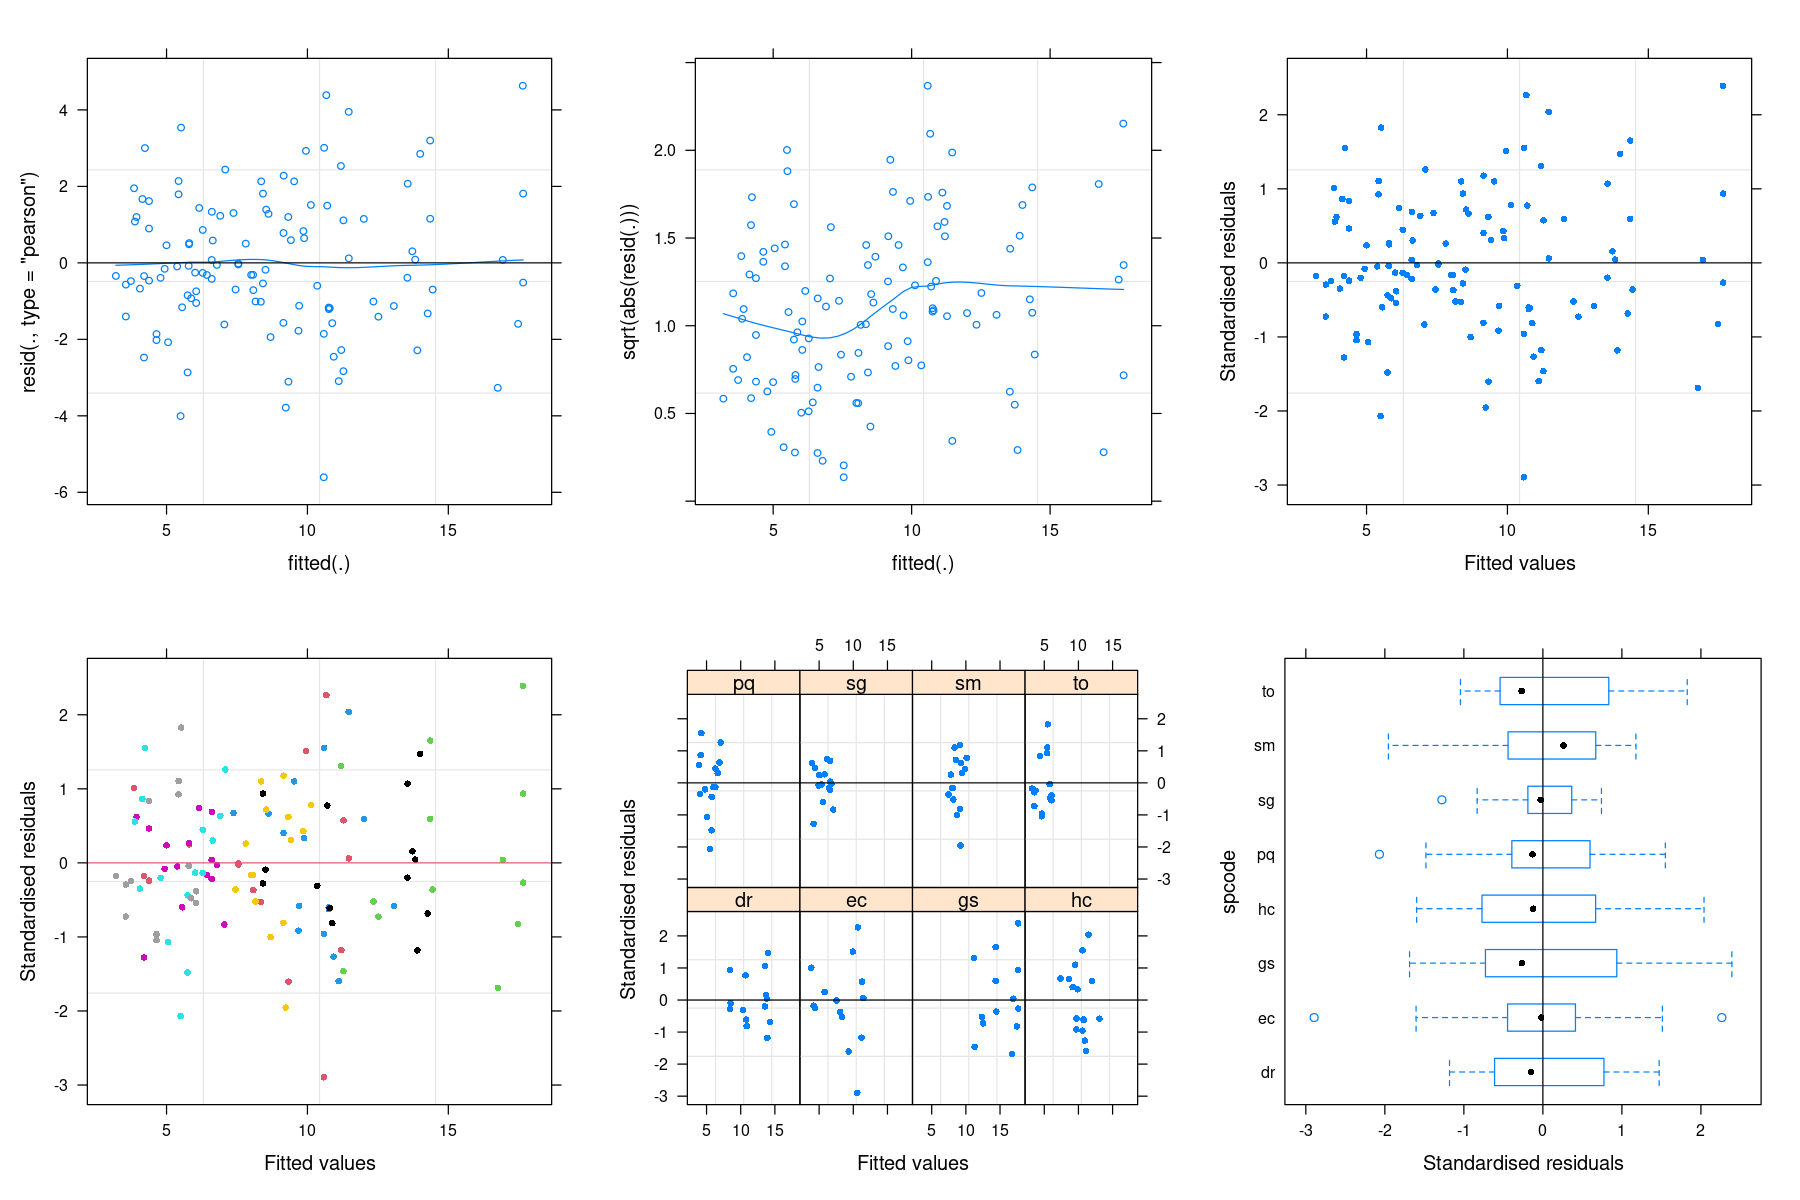

In [63]:
par(mfrow = c(3,3))
validation_plots(models_q1$total_biomass, data = data_for_models,group = "spcode")


### RGR

[1] "No variable specified inthe variables argument"


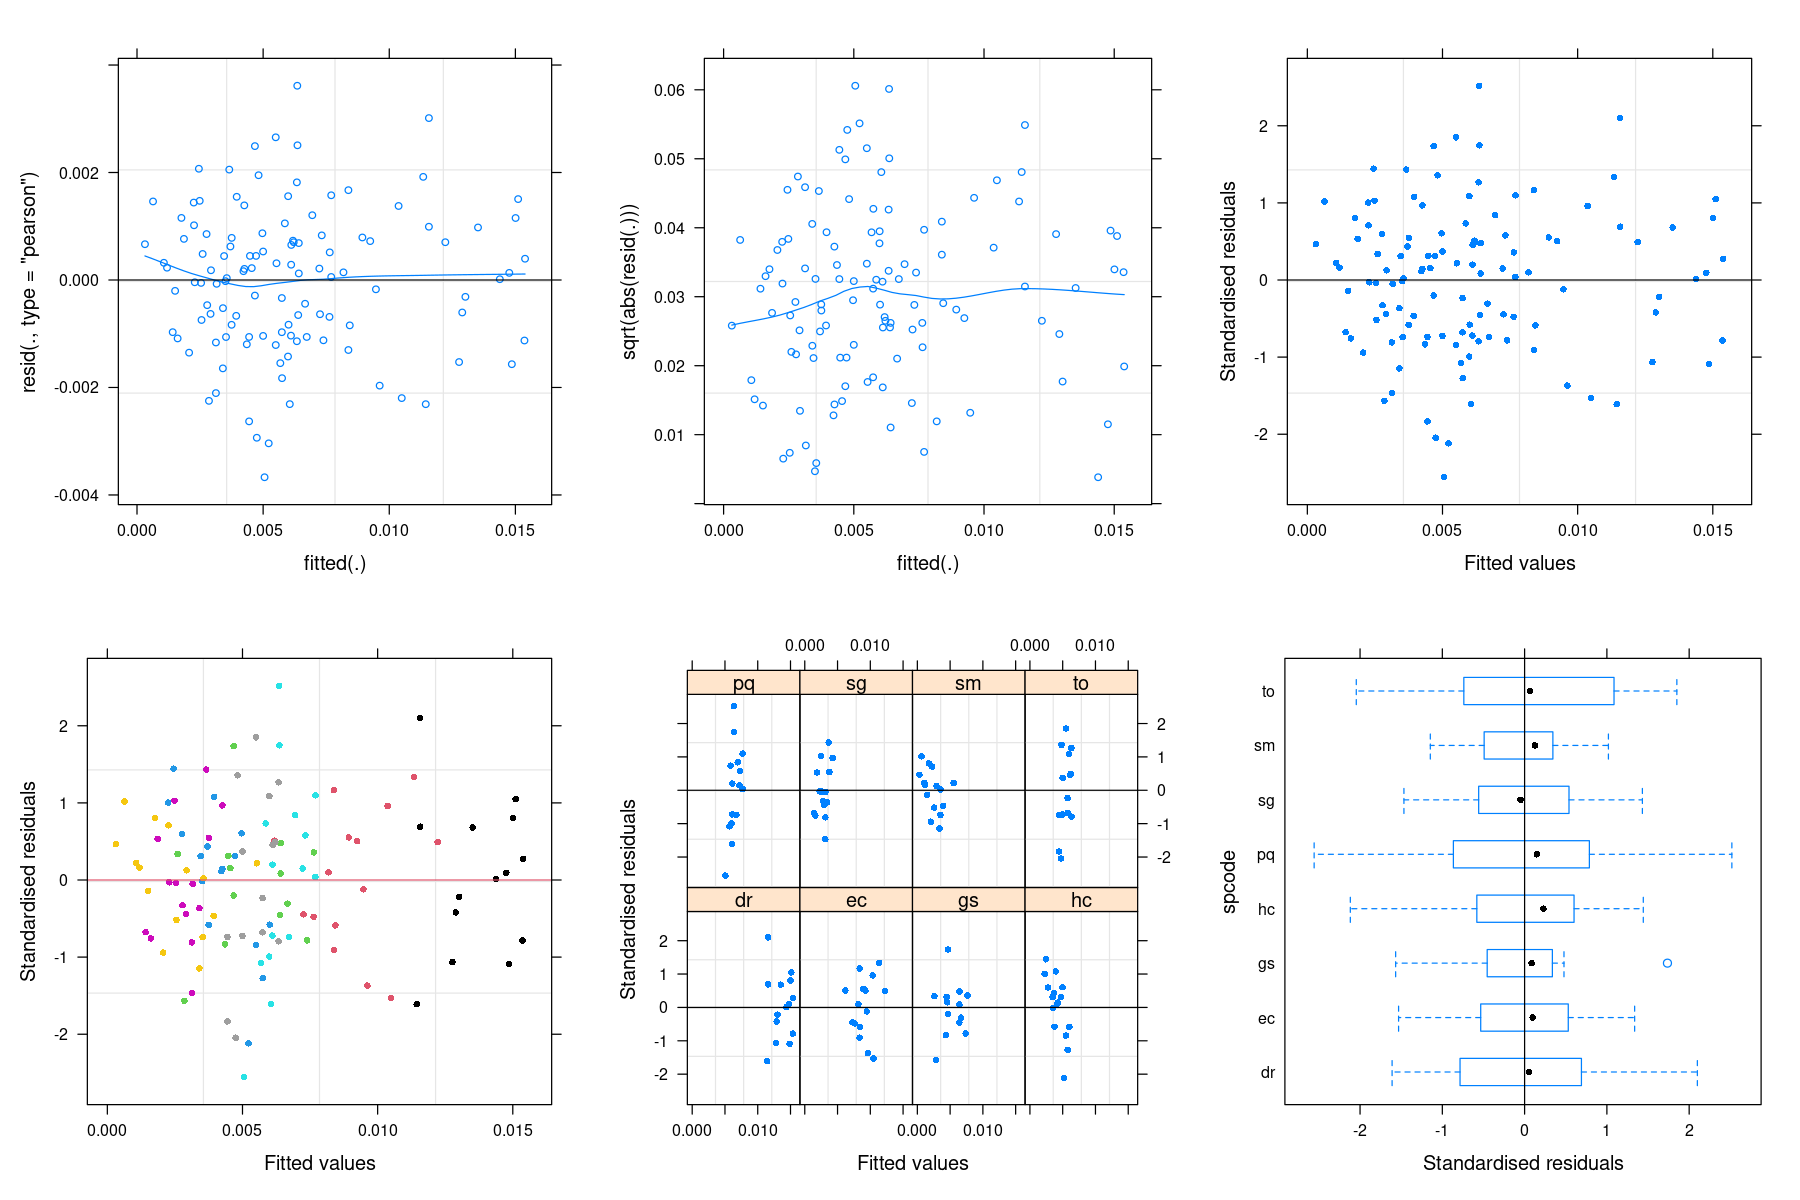

In [64]:
par(mfrow = c(3,3))
validation_plots(models_q1$rgr, data = data_for_models,group = "spcode")

### Root-Shoot ratio

[1] "No variable specified inthe variables argument"


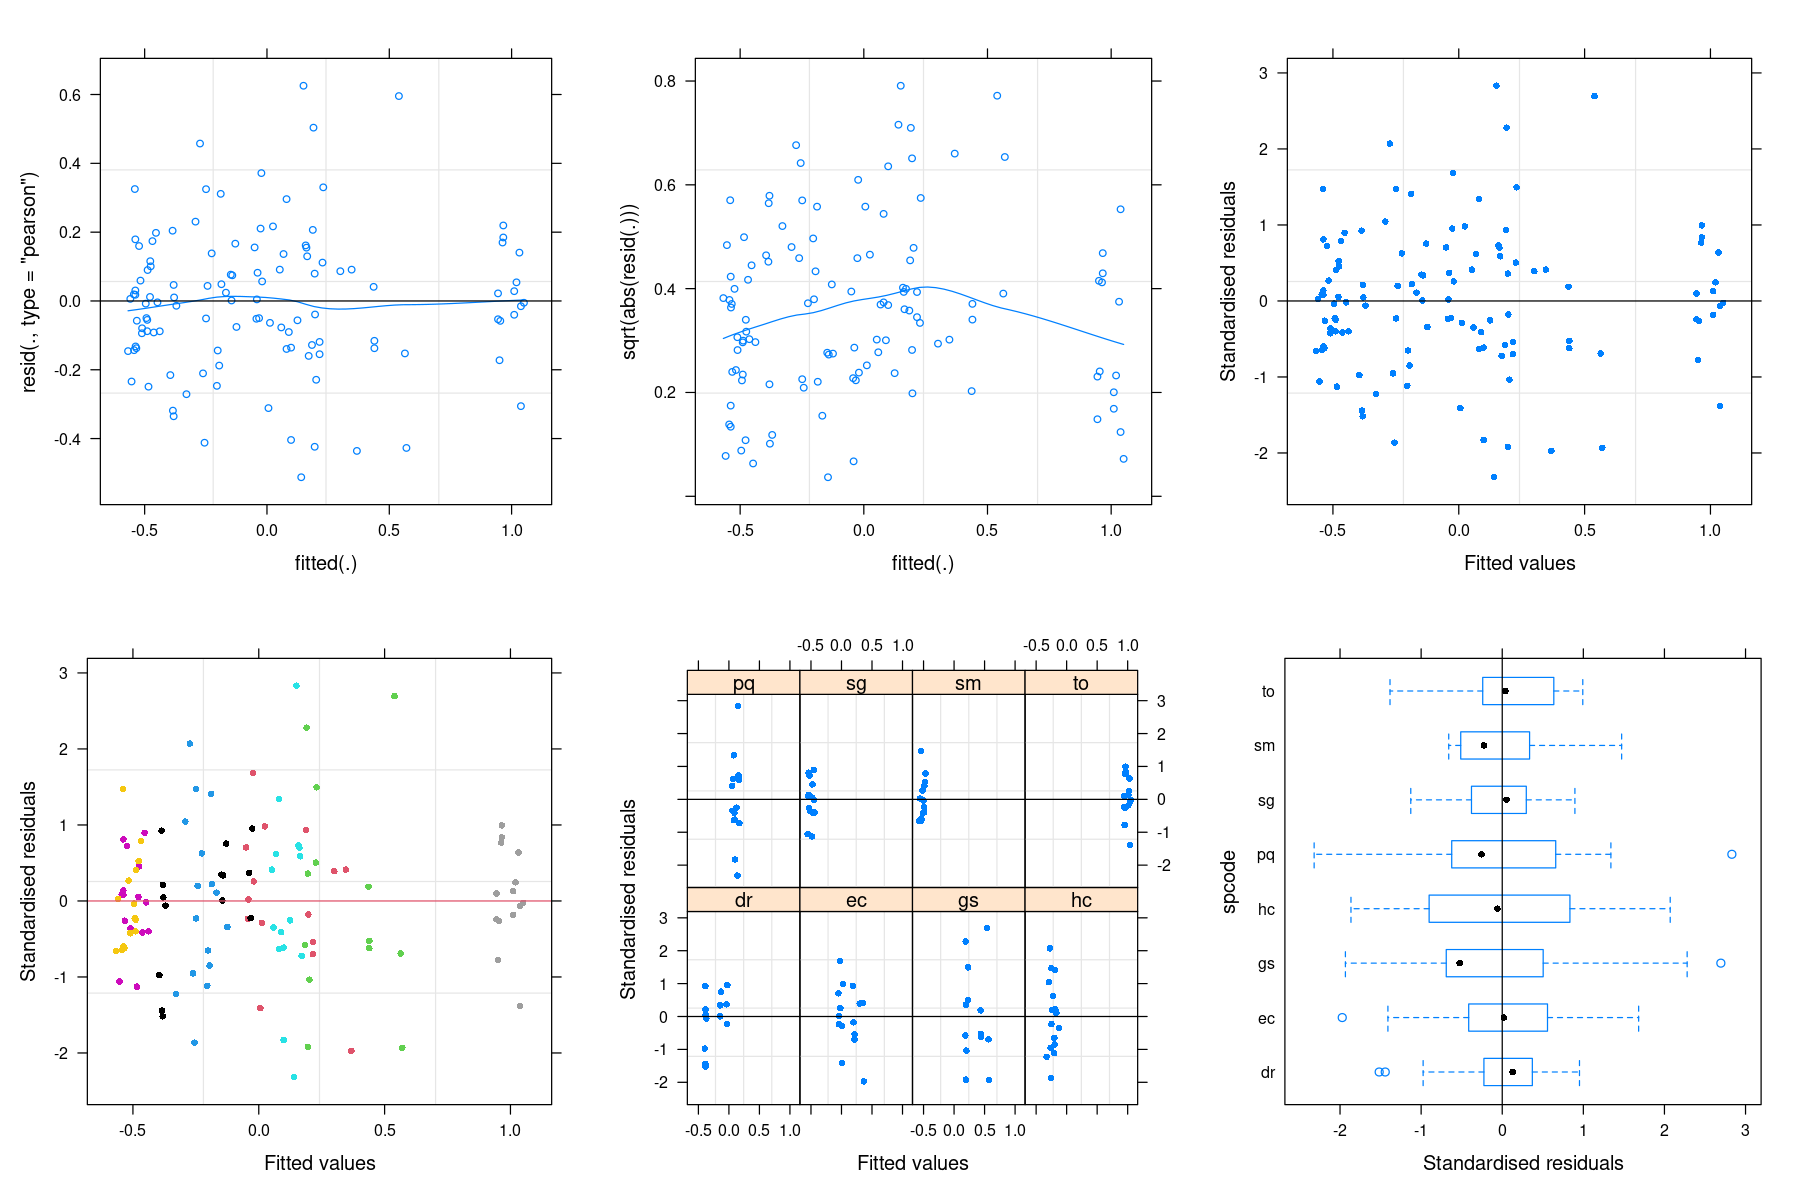

In [65]:
par(mfrow = c(3,3))
validation_plots(models_q1$root_shoot_ratio_log,
                data = data_for_models,
                group = "spcode")

## Model inference

### Anova tables

In [66]:
map(models_q1, ~Anova(.x, type = "III", test.statistic = c("F")))

,F,Df,Df.res,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.15452871,1,8.397321,0.704036738
nfixer,0.03019342,1,6.268875,0.867528160
treatment,0.69733454,3,102.114416,0.555777495
init_height,0.67701725,1,107.325757,0.412440147
nfixer:treatment,4.49351832,3,102.069497,0.005275981
,F,Df,Df.res,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),4.996277,1,12.061687,0.045076038
treatment,5.763833,3,102.318212,0.001105776


### Post-Hoc: Tukey's test

#### Total Biomass

In [68]:
as_tibble(emmeans(models_q1$total_biomass,
        pairwise ~ treatment*nfixer,
        adjust = "tukey"
        )$contrast)  %>%
        reactable()

HTML widgets cannot be represented in plain text (need html)

#### RGR

In [69]:
as_tibble(emmeans(models_q1$rgr,
        pairwise ~ treatment*nfixer,
        adjust = "tukey"
        )$contrast)  %>%
        reactable()

HTML widgets cannot be represented in plain text (need html)

#### Root-Shoot Ratio

In [70]:
as_tibble(emmeans(models_q1$root_shoot_ratio_log,
        pairwise ~ treatment*nfixer,
        adjust = "tukey"
        )$contrast)  %>%
        reactable()

HTML widgets cannot be represented in plain text (need html)

### Treatment effects

In [71]:
emmeans_table_tidy(models_q1$total_biomass,
                        formula = "treatment|nfixer",
                        grouping_var = "nfixer")

[1] "Formula for pairwise comparisons: "
pairwise ~ treatment | nfixer
<environment: 0x5fc4930b2068>


Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”
`mutate_if()` ignored the following grouping variables:
• Column `nfixer`


HTML widgets cannot be represented in plain text (need html)

In [ ]:
emmeans_table_tidy(models_q1$rgr,
                        formula = "treatment|nfixer",
                        grouping_var = "nfixer")

In [72]:
emmeans_table_tidy(models_q1$root_shoot_ratio_log,
                        formula = "treatment|nfixer",
                        grouping_var = "nfixer")

[1] "Formula for pairwise comparisons: "
pairwise ~ treatment | nfixer
<environment: 0x5fc48fce0440>


Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”
`mutate_if()` ignored the following grouping variables:
• Column `nfixer`


HTML widgets cannot be represented in plain text (need html)